<a href="https://colab.research.google.com/github/Peterbamidele/DataScience_Project/blob/master/Cereal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import highchart as hchart
cereal_dataset = pd.read_csv('cereal.csv')

In [5]:
cereal_dataset.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [61]:
cereal_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          77 non-null     object 
 1   mfr           77 non-null     object 
 2   type          77 non-null     object 
 3   calories      77 non-null     int64  
 4   protein       77 non-null     int64  
 5   fat           77 non-null     int64  
 6   sodium        77 non-null     int64  
 7   fiber         77 non-null     float64
 8   carbo         77 non-null     float64
 9   sugars        77 non-null     int64  
 10  potass        77 non-null     int64  
 11  vitamins      77 non-null     int64  
 12  shelf         77 non-null     int64  
 13  weight        77 non-null     float64
 14  cups          77 non-null     float64
 15  rating        77 non-null     float64
 16  carbohydrate  77 non-null     float64
 17  minerals      77 non-null     int64  
dtypes: float64(6), int64(9), object(

In [69]:
cereal_dataset.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,carbohydrate,minerals
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705,23.671429,255.753247
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289,4.569028,108.258846
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851,0.700000,15.000000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094,22.000000,175.000000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208,24.000000,260.000000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392,25.000000,310.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912,33.000000,580.000000


In [6]:
cereal_dataset.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

Conbining the column that are under the calss of food  

In [7]:
carbohydrates = cereal_dataset['carbo'] + cereal_dataset['sugars'] + cereal_dataset['fiber']

In [8]:
cereal_dataset['carbohydrate'] = carbohydrates

In [9]:
minerals = cereal_dataset['sodium'] + cereal_dataset['potass']

In [10]:
cereal_dataset['minerals'] = minerals

In [11]:
cereal_dataset

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,carbohydrate,minerals
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,21.0,410
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,18.0,150
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,21.0,580
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,22.0,470
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,23.0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,24.0,310
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,25.0,165
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,23.0,345
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,23.0,310


In [12]:
new_cereal_dataset = cereal_dataset[['name','protein','fat','carbohydrate','minerals','vitamins']]
new_cereal_dataset

,name,protein,fat,carbohydrate,minerals,vitamins
0,100% Bran,4,1,21.0,410,25
1,100% Natural Bran,3,5,18.0,150,0
2,All-Bran,4,1,21.0,580,25
3,All-Bran with Extra Fiber,4,0,22.0,470,25
4,Almond Delight,2,2,23.0,199,25
...,...,...,...,...,...,...
72,Triples,2,1,24.0,310,25
73,Trix,1,1,25.0,165,25
74,Wheat Chex,3,1,23.0,345,25
75,Wheaties,3,1,23.0,310,25


# List for cereals with a high proportion of each class of food

1.Carbohydrate

In [63]:
carbohydrate_dataset = new_cereal_dataset[['name','carbohydrate']]
carbohydrate_dataset = carbohydrate_dataset.sort_values('carbohydrate')
carbohydrate_dataset

,name,carbohydrate
57,Quaker Oatmeal,0.7
55,Puffed Wheat,11.0
54,Puffed Rice,13.0
1,100% Natural Bran,18.0
43,Maypo,19.0
...,...,...
52,Post Nat. Raisin Bran,31.0
49,Nutri-Grain Almond-Raisin,31.0
58,Raisin Bran,31.0
46,Mueslix Crispy Blend,33.0


#Bar-chat with cereals the highest carbohydrate content

In [14]:
carbohydrate_dataset_tail = carbohydrate_dataset.tail(5)
carbohydrate_dataset_tail

,name,carbohydrate
52,Post Nat. Raisin Bran,31.0
49,Nutri-Grain Almond-Raisin,31.0
58,Raisin Bran,31.0
46,Mueslix Crispy Blend,33.0
70,Total Raisin Bran,33.0


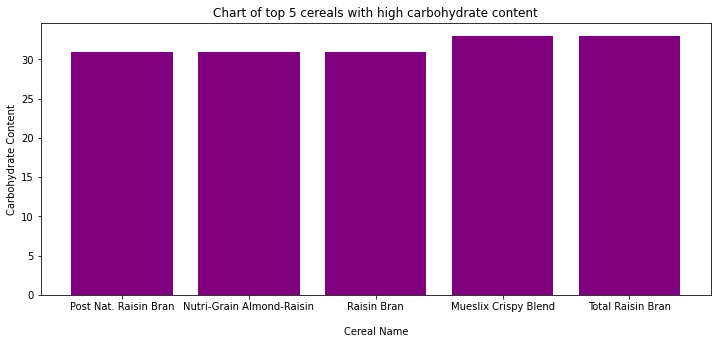

In [15]:
plt.figure(figsize = (12,5))
plt.title("Chart of top 5 cereals with high carbohydrate content")
plt.xlabel("Cereal Name",labelpad=15)
plt.ylabel("Carbohydrate Content")
plt.bar(carbohydrate_dataset_tail['name'],carbohydrate_dataset_tail['carbohydrate'],color="purple")
plt.show()

 Raisin Bran and Mueslix Cripsy Blend are the cereals with the highest carbohydrate conten

2.Protein

In [16]:
protein_dataset = new_cereal_dataset[['name','protein']]
protein_dataset

,name,protein
0,100% Bran,4
1,100% Natural Bran,3
2,All-Bran,4
3,All-Bran with Extra Fiber,4
4,Almond Delight,2
...,...,...
72,Triples,2
73,Trix,1
74,Wheat Chex,3
75,Wheaties,3


In [17]:
dataframe = protein_dataset.sort_values('protein')
dataframe

,name,protein
54,Puffed Rice,1
31,Golden Grahams,1
35,Honey Graham Ohs,1
37,Honey-comb,1
18,Count Chocula,1
...,...,...
2,All-Bran,4
0,100% Bran,4
57,Quaker Oatmeal,5
67,Special K,6


#Bar-chat with cereals the highest Protein content

In [18]:
sorted_protein_dataset = dataframe.tail(5)
sorted_protein_dataset

,name,protein
2,All-Bran,4
0,100% Bran,4
57,Quaker Oatmeal,5
67,Special K,6
11,Cheerios,6


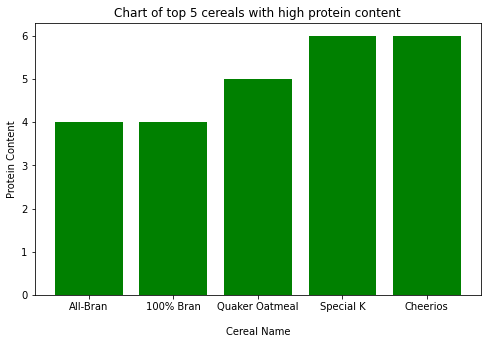

In [19]:
plt.figure(figsize = (8,5))
plt.title("Chart of top 5 cereals with high protein content")
plt.xlabel("Cereal Name",labelpad=15)
plt.ylabel("Protein Content")
plt.bar(sorted_protein_dataset['name'],sorted_protein_dataset['protein'],color='green')
plt.show()

 Cheerios and Special K are the cereals with the most protein content

3.*Minerals*

In [20]:
minerals_dataset = new_cereal_dataset[['name','minerals']]
minerals_dataset = minerals_dataset.sort_values('minerals')
minerals_dataset

,name,minerals
54,Puffed Rice,15
55,Puffed Wheat,50
20,Cream of Wheat (Quick),79
30,Golden Crisp,85
63,Shredded Wheat,95
...,...,...
28,Fruitful Bran,430
58,Raisin Bran,450
52,Post Nat. Raisin Bran,460
3,All-Bran with Extra Fiber,470


In [23]:
mineral_dataset = minerals_dataset.tail(5)
mineral_dataset

,name,minerals
28,Fruitful Bran,430
58,Raisin Bran,450
52,Post Nat. Raisin Bran,460
3,All-Bran with Extra Fiber,470
2,All-Bran,580


<BarContainer object of 5 artists>

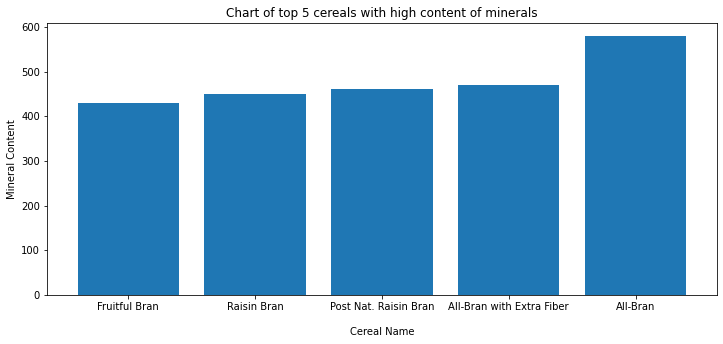

In [25]:
plt.figure(figsize=(12,5))
plt.title("Chart of top 5 cereals with high content of minerals")
plt.xlabel("Cereal Name",labelpad=15)
plt.ylabel("Mineral Content")
plt.bar(mineral_dataset['name'],mineral_dataset['minerals'])

Bran is the cereal with the most mineral content

4.Fat

In [26]:
fat_dataset = new_cereal_dataset[['name','fat']]
fat_dataset

,name,fat
0,100% Bran,1
1,100% Natural Bran,5
2,All-Bran,1
3,All-Bran with Extra Fiber,0
4,Almond Delight,2
...,...,...
72,Triples,1
73,Trix,1
74,Wheat Chex,1
75,Wheaties,1


In [27]:
fat_dataset = fat_dataset.sort_values('fat')
fat_dataset

,name,fat
20,Cream of Wheat (Quick),0
55,Puffed Wheat,0
26,Frosted Mini-Wheats,0
25,Frosted Flakes,0
60,Raisin Squares,0
...,...,...
12,Cinnamon Toast Crunch,3
45,Muesli Raisins; Peaches; & Pecans,3
44,Muesli Raisins; Dates; & Almonds,3
19,Cracklin' Oat Bran,3


In [28]:
fat_dataset = fat_dataset.tail(5)
fat_dataset

,name,fat
12,Cinnamon Toast Crunch,3
45,Muesli Raisins; Peaches; & Pecans,3
44,Muesli Raisins; Dates; & Almonds,3
19,Cracklin' Oat Bran,3
1,100% Natural Bran,5


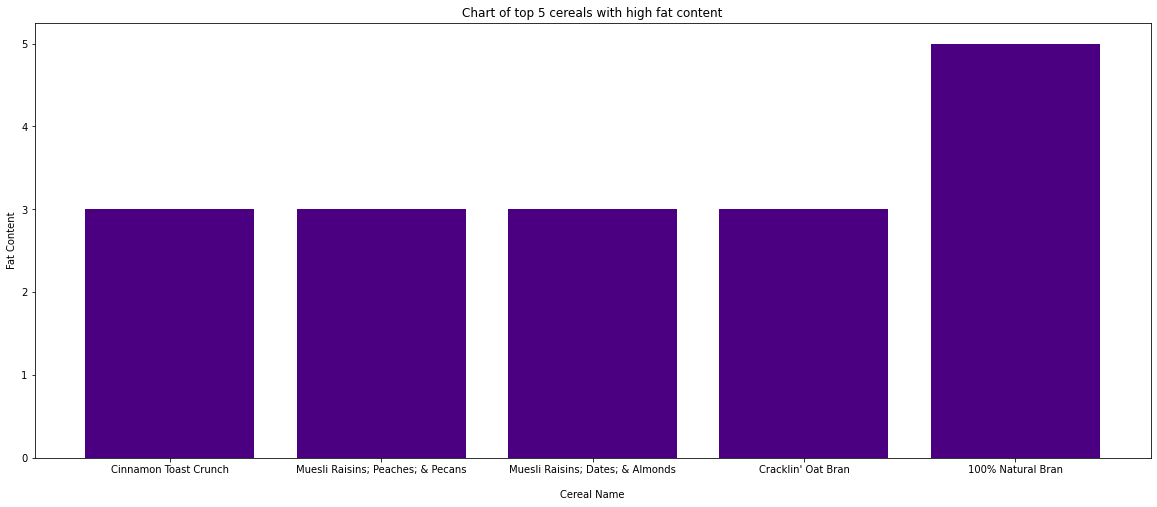

In [29]:
plt.figure(figsize = (20,8))
plt.title("Chart of top 5 cereals with high fat content")
plt.xlabel("Cereal Name",labelpad=15)
plt.ylabel("Fat Content")
plt.bar(fat_dataset['name'],fat_dataset['fat'],color="indigo")
plt.show()

100% Natural Bran is the cereal with the most fat content

5.Vitamin

In [30]:
vitamins_dataset = new_cereal_dataset[['name','vitamins']]
vitamins_dataset = vitamins_dataset.sort_values('vitamins')
vitamins_dataset

,name,vitamins
63,Shredded Wheat,0
55,Puffed Wheat,0
57,Quaker Oatmeal,0
54,Puffed Rice,0
64,Shredded Wheat 'n'Bran,0
...,...,...
53,Product 19,100
70,Total Raisin Bran,100
69,Total Corn Flakes,100
71,Total Whole Grain,100


In [31]:
vitamin_dataset = vitamins_dataset.tail(5)
vitamin_dataset

,name,vitamins
53,Product 19,100
70,Total Raisin Bran,100
69,Total Corn Flakes,100
71,Total Whole Grain,100
38,Just Right Crunchy Nuggets,100


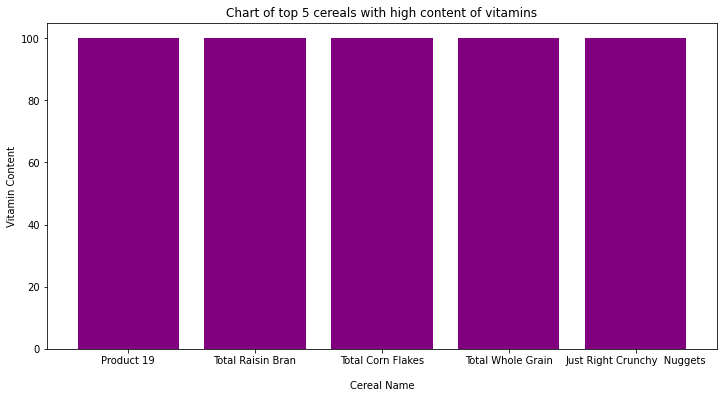

In [32]:
plt.figure(figsize = (12,6))
plt.title("Chart of top 5 cereals with high content of vitamins")
plt.xlabel("Cereal Name",labelpad=15)
plt.ylabel("Vitamin Content")
plt.bar(vitamin_dataset['name'],vitamin_dataset['vitamins'],color="purple")
plt.show()

Most of the cereals have an equal amount of vitamins in them.They are good for the body

#Recommendations for some health challenges


1. Diabetes

In [33]:
cereal_dataset

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,carbohydrate,minerals
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,21.0,410
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,18.0,150
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,21.0,580
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,22.0,470
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,23.0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,24.0,310
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,25.0,165
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,23.0,345
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,23.0,310


In [34]:
fiber_dataset = cereal_dataset[['name','fiber']]
fiber_dataset

,name,fiber
0,100% Bran,10.0
1,100% Natural Bran,2.0
2,All-Bran,9.0
3,All-Bran with Extra Fiber,14.0
4,Almond Delight,1.0
...,...,...
72,Triples,0.0
73,Trix,0.0
74,Wheat Chex,3.0
75,Wheaties,3.0


In [35]:
sorted_fiber_dataset = fiber_dataset.sort_values('fiber')
sorted_fiber_dataset

,name,fiber
12,Cinnamon Toast Crunch,0.0
31,Golden Grahams,0.0
37,Honey-comb,0.0
40,Kix,0.0
18,Count Chocula,0.0
...,...,...
58,Raisin Bran,5.0
52,Post Nat. Raisin Bran,6.0
2,All-Bran,9.0
0,100% Bran,10.0


In [36]:
sorted_fiber_dataset = sorted_fiber_dataset.tail()
sorted_fiber_dataset

,name,fiber
58,Raisin Bran,5.0
52,Post Nat. Raisin Bran,6.0
2,All-Bran,9.0
0,100% Bran,10.0
3,All-Bran with Extra Fiber,14.0


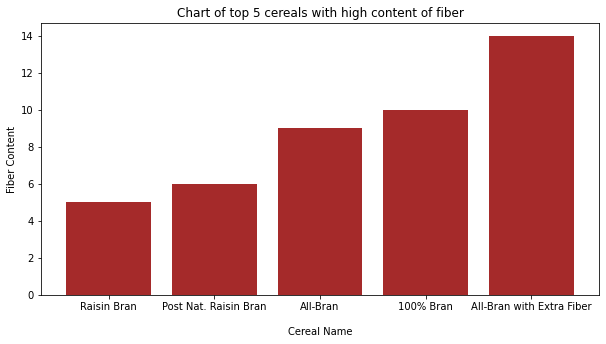

In [37]:
plt.figure(figsize=(10,5))
plt.title("Chart of top 5 cereals with high content of fiber")
plt.xlabel("Cereal Name",labelpad=15)
plt.ylabel("Fiber Content")
plt.bar(sorted_fiber_dataset['name'],sorted_fiber_dataset['fiber'],color="brown")
plt.show()

Result show Bran with Extra Fiber is the best cereal for diabetic patients,

2.High Blood Pressure

In [38]:
potas_sorted_dataset = cereal_dataset.sort_values('potass')
potas_sorted_dataset

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,carbohydrate,minerals
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816,22.0,79
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843,23.0,199
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,60.756112,13.0,15
17,Corn Pops,K,C,110,1,0,90,1.0,13.0,12,20,25,2,1.00,1.00,35.782791,26.0,110
15,Corn Chex,R,C,110,2,0,280,0.0,22.0,3,25,25,1,1.00,1.00,41.445019,25.0,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Raisin Bran,K,C,120,3,1,210,5.0,14.0,12,240,25,2,1.33,0.75,39.259197,31.0,450
52,Post Nat. Raisin Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594,31.0,460
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,21.0,410
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505,21.0,580


In [39]:
potas_sorted_dataset = potas_sorted_dataset.tail(20)
potas_sorted_dataset

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,carbohydrate,minerals
22,Crispy Wheat & Raisins,G,C,100,2,1,140,2.0,11.0,10,120,25,3,1.00,0.75,36.176196,23.0,260
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787,23.0,120
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253,25.0,325
49,Nutri-Grain Almond-Raisin,K,C,140,3,2,220,3.0,21.0,7,130,25,3,1.33,0.67,40.692320,31.0,350
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679,18.0,150
59,Raisin Nut Bran,G,C,100,3,2,140,2.5,10.5,8,140,25,3,1.00,0.50,39.703400,21.0,280
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949,23.0,140
19,Cracklin' Oat Bran,K,C,110,3,3,140,4.0,10.0,7,160,25,3,1.00,0.50,40.448772,21.0,300
46,Mueslix Crispy Blend,K,C,160,3,2,150,3.0,17.0,13,160,25,3,1.50,0.67,30.313351,33.0,310
44,Muesli Raisins; Dates; & Almonds,R,C,150,4,3,95,3.0,16.0,11,170,25,3,1.00,1.00,37.136863,30.0,265


In [40]:
p_sodium_sorted = potas_sorted_dataset.sort_values('sodium')
p_sodium_sorted

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,carbohydrate,minerals
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787,23.0,120
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949,23.0,140
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679,18.0,150
44,Muesli Raisins; Dates; & Almonds,R,C,150,4,3,95,3.0,16.0,11,170,25,3,1.00,1.00,37.136863,30.0,265
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,21.0,410
19,Cracklin' Oat Bran,K,C,110,3,3,140,4.0,10.0,7,160,25,3,1.00,0.50,40.448772,21.0,300
22,Crispy Wheat & Raisins,G,C,100,2,1,140,2.0,11.0,10,120,25,3,1.00,0.75,36.176196,23.0,260
59,Raisin Nut Bran,G,C,100,3,2,140,2.5,10.5,8,140,25,3,1.00,0.50,39.703400,21.0,280
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912,22.0,470
46,Mueslix Crispy Blend,K,C,160,3,2,150,3.0,17.0,13,160,25,3,1.50,0.67,30.313351,33.0,310


In [41]:
p_sodium_sorted.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,carbohydrate,minerals
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.0,0.67,72.801787,23.0,120
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.0,0.67,74.472949,23.0,140
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,18.0,150
44,Muesli Raisins; Dates; & Almonds,R,C,150,4,3,95,3.0,16.0,11,170,25,3,1.0,1.00,37.136863,30.0,265
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,21.0,410
19,Cracklin' Oat Bran,K,C,110,3,3,140,4.0,10.0,7,160,25,3,1.0,0.50,40.448772,21.0,300
22,Crispy Wheat & Raisins,G,C,100,2,1,140,2.0,11.0,10,120,25,3,1.0,0.75,36.176196,23.0,260
59,Raisin Nut Bran,G,C,100,3,2,140,2.5,10.5,8,140,25,3,1.0,0.50,39.703400,21.0,280
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,22.0,470
46,Mueslix Crispy Blend,K,C,160,3,2,150,3.0,17.0,13,160,25,3,1.5,0.67,30.313351,33.0,310


In [42]:
hbp_dataset = p_sodium_sorted[['name','potass','sodium','fat']]
hbp_dataset

,name,potass,sodium,fat
65,Shredded Wheat spoon size,120,0,0
64,Shredded Wheat 'n'Bran,140,0,0
1,100% Natural Bran,135,15,5
44,Muesli Raisins; Dates; & Almonds,170,95,3
0,100% Bran,280,130,1
19,Cracklin' Oat Bran,160,140,3
22,Crispy Wheat & Raisins,120,140,1
59,Raisin Nut Bran,140,140,2
3,All-Bran with Extra Fiber,330,140,0
46,Mueslix Crispy Blend,160,150,2


#Chart of cereals eligible for people with high blood pressure

In [43]:
hbp_rec_dataset = hbp_dataset.head()
hbp_rec_dataset = hbp_rec_dataset.reset_index()
hbp_rec_dataset

,index,name,potass,sodium,fat
0,65,Shredded Wheat spoon size,120,0,0
1,64,Shredded Wheat 'n'Bran,140,0,0
2,1,100% Natural Bran,135,15,5
3,44,Muesli Raisins; Dates; & Almonds,170,95,3
4,0,100% Bran,280,130,1


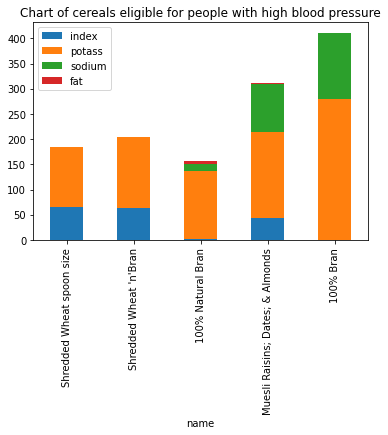

In [44]:
hbp_rec_dataset.set_index('name',inplace=True)
hbp_rec_dataset.plot(kind='bar', stacked='True',title="Chart of cereals eligible for people with high blood pressure")

Shredded Wheat Spoon size and Shredded Wheat'n'Bran are recommended for people with High Blood Pressure,They contain no fat, no sodium and a good amount of potassium

3.KWASHIOKOR.
*It mostly affects children when they don't have enough protein and vitamins in their food

In [45]:
Kwa_dataset = cereal_dataset[['name','protein','vitamins']]
Kwa_dataset

,name,protein,vitamins
0,100% Bran,4,25
1,100% Natural Bran,3,0
2,All-Bran,4,25
3,All-Bran with Extra Fiber,4,25
4,Almond Delight,2,25
...,...,...,...
72,Triples,2,25
73,Trix,1,25
74,Wheat Chex,3,25
75,Wheaties,3,25


In [46]:
Kwa_dataset1 = Kwa_dataset.sort_values('protein')
Kwa_dataset1

,name,protein,vitamins
54,Puffed Rice,1,0
31,Golden Grahams,1,25
35,Honey Graham Ohs,1,25
37,Honey-comb,1,25
18,Count Chocula,1,25
...,...,...,...
2,All-Bran,4,25
0,100% Bran,4,25
57,Quaker Oatmeal,5,0
67,Special K,6,25


In [47]:
Kwa_dataframe = Kwa_dataset1.tail()
Kwa_dataframe = Kwa_dataframe.reset_index()
Kwa_dataframe

,index,name,protein,vitamins
0,2,All-Bran,4,25
1,0,100% Bran,4,25
2,57,Quaker Oatmeal,5,0
3,67,Special K,6,25
4,11,Cheerios,6,25


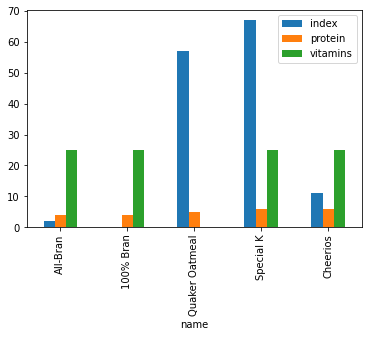

In [48]:
Kwa_dataframe.set_index('name',inplace=True)
Kwa_dataframe.plot(kind='bar')

Result show that Children with Kwashiokor can take Special K and Cheerios as they have the highest content of protein and **vitamins**

#Recommendation For the elderly people
Older people need more Potassium, Fiber, Vitamins and less Sodium and fat

In [49]:
eld_dataset = cereal_dataset[['name','vitamins','fiber','potass','fat','sodium']]
eld_dataset

,name,vitamins,fiber,potass,fat,sodium
0,100% Bran,25,10.0,280,1,130
1,100% Natural Bran,0,2.0,135,5,15
2,All-Bran,25,9.0,320,1,260
3,All-Bran with Extra Fiber,25,14.0,330,0,140
4,Almond Delight,25,1.0,-1,2,200
...,...,...,...,...,...,...
72,Triples,25,0.0,60,1,250
73,Trix,25,0.0,25,1,140
74,Wheat Chex,25,3.0,115,1,230
75,Wheaties,25,3.0,110,1,200


In [50]:
eld_dataset1 = eld_dataset.sort_values('sodium')
eld_dataset1

,name,vitamins,fiber,potass,fat,sodium
63,Shredded Wheat,0,3.0,95,0,0
43,Maypo,25,0.0,95,1,0
54,Puffed Rice,0,0.0,15,0,0
65,Shredded Wheat spoon size,0,3.0,120,0,0
64,Shredded Wheat 'n'Bran,0,4.0,140,0,0
...,...,...,...,...,...,...
15,Corn Chex,25,0.0,25,0,280
16,Corn Flakes,25,1.0,35,0,290
62,Rice Krispies,25,0.0,35,0,290
11,Cheerios,25,2.0,105,2,290


In [51]:
eld_dataset2 = eld_dataset1.head(20)
eld_dataset2

,name,vitamins,fiber,potass,fat,sodium
63,Shredded Wheat,0,3.0,95,0,0
43,Maypo,25,0.0,95,1,0
54,Puffed Rice,0,0.0,15,0,0
65,Shredded Wheat spoon size,0,3.0,120,0,0
64,Shredded Wheat 'n'Bran,0,4.0,140,0,0
60,Raisin Squares,25,2.0,110,0,0
55,Puffed Wheat,0,1.0,50,0,0
57,Quaker Oatmeal,0,2.7,110,2,0
26,Frosted Mini-Wheats,25,3.0,100,0,0
1,100% Natural Bran,0,2.0,135,5,15


In [52]:
eld_dataset3 = eld_dataset2.head(10)
eld_dataset3

,name,vitamins,fiber,potass,fat,sodium
63,Shredded Wheat,0,3.0,95,0,0
43,Maypo,25,0.0,95,1,0
54,Puffed Rice,0,0.0,15,0,0
65,Shredded Wheat spoon size,0,3.0,120,0,0
64,Shredded Wheat 'n'Bran,0,4.0,140,0,0
60,Raisin Squares,25,2.0,110,0,0
55,Puffed Wheat,0,1.0,50,0,0
57,Quaker Oatmeal,0,2.7,110,2,0
26,Frosted Mini-Wheats,25,3.0,100,0,0
1,100% Natural Bran,0,2.0,135,5,15


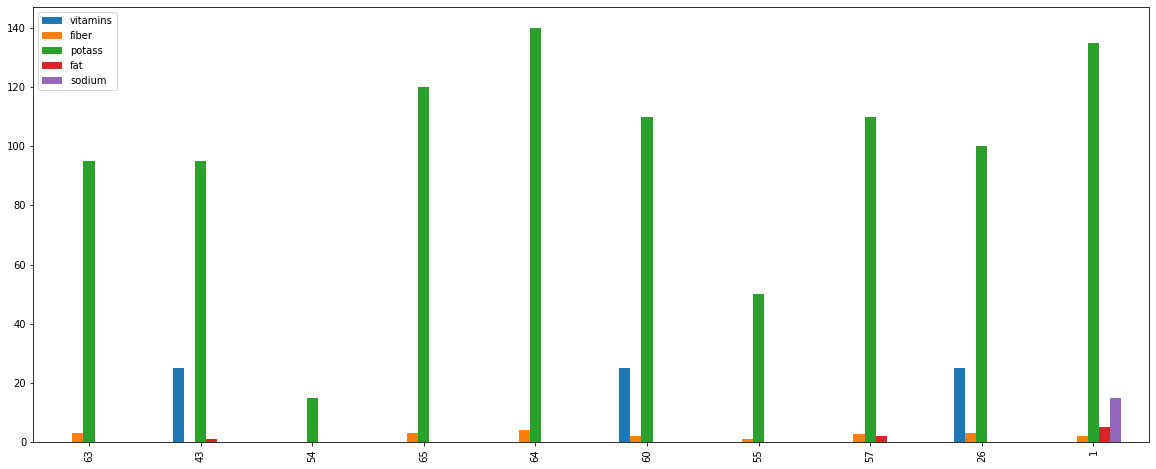

In [53]:
eld_dataset3.plot(kind='bar',figsize=(20,8))

#List of cereal Taking wheather cold or hot

In [54]:
type_dataset = cereal_dataset.groupby('type')['type'].count()
type_dataset

type
C    74
H     3
Name: type, dtype: int64

#Pie chart of cereal taking cold or hot

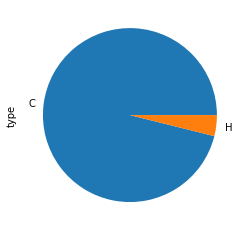

In [55]:
type_dataset.plot(kind="pie")

In [65]:
table = pd.crosstab(cereal_dataset["mfr"], cereal_dataset["type"])
table

type,C,H
mfr,,
A,0,1
G,22,0
K,23,0
N,5,1
P,9,0
Q,7,1
R,8,0


#Manufacturer of cereal
#A = American Home Food Products;
#G = General Mills
#K = Kelloggs
#N = Nabisco
#P = Post
#Q = Quaker Oats
#R = Ralston Purina

In [56]:
mfr_dataset = cereal_dataset.groupby('mfr')['mfr'].count()
mfr_dataset

mfr
A     1
G    22
K    23
N     6
P     9
Q     8
R     8
Name: mfr, dtype: int64

#Pie chart to display the highest Manufacturer of cereal

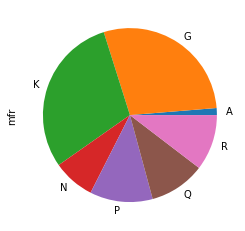

In [57]:
mfr_dataset.plot(kind="pie")

In [58]:
mfr_A = cereal_dataset.loc[cereal_dataset['mfr'] == 'A']
mfr_a = mfr_A.drop(columns=['shelf','weight','cups','rating','carbohydrate','minerals'])
mfr_A
mfr_a
mfr_a_mean = mfr_a.mean()
mfr_a_mean

calories    100.0
protein       4.0
fat           1.0
sodium        0.0
fiber         0.0
carbo        16.0
sugars        3.0
potass       95.0
vitamins     25.0
dtype: float64

#Calculation of Nutrients in all cereal 

In [81]:
sum_of_nutrients = new_cereal_dataset[['carbohydrate_sum','protein_sum','minerals_sum','fat_sum','vitamins_sum']]
sum_of_nutrients

,carbohydrate_sum,protein_sum,minerals_sum,fat_sum,vitamins_sum
0,1822.7,196,19693,78,2175
1,1822.7,196,19693,78,2175
2,1822.7,196,19693,78,2175
3,1822.7,196,19693,78,2175
4,1822.7,196,19693,78,2175
...,...,...,...,...,...
72,1822.7,196,19693,78,2175
73,1822.7,196,19693,78,2175
74,1822.7,196,19693,78,2175
75,1822.7,196,19693,78,2175


In [83]:
food_classes =sum_of_nutrients[74:75]
food_classes

,carbohydrate_sum,protein_sum,minerals_sum,fat_sum,vitamins_sum
74,1822.7,196,19693,78,2175


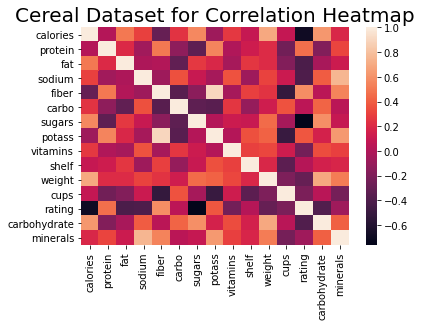

In [87]:
sns.heatmap(cereal_dataset.corr())
plt.title('Cereal Dataset Correlation Heatmap', fontsize=20)
plt.show()